# Projeto 2 - Ciência dos Dados

• Alunos: Gustavo Guedes, Maia Fleider, Natália Carreras e Tiago Seixas. 

## > Introdução

### ❑ Objetivos e detalhes da base de dados:

▶ O objetivo geral de nosso projeto é realizar um **modelo de predição** de **níveis de radiação solar**. Nesse sentido, analisamos também como outras features (umidade e temperatura, por exemplo) influenciam o comportamento da varíavel. Para a realização do projeto, utlizamos uma base de dados fornecida a participantes da NASA Hackathon (Space Apps Moscow).

▶ A base de dados foi produzida através de dados metereológicos retirados, ao longo de meses, da estação HI-SEAS, localizada no Havaí, Estados Unidos.

<ol>• Para mais detalhes, acesse: 
<li> Kaggle (base de dados): <a href="https://www.kaggle.com/dronio/SolarEnergy" > Solar Radiation </a> </li>
</ol>

<img src="img/painelsolar.jpg" width=550>

## > Minerando Dados e Características do Dataset

In [17]:
#Importando biblotecas úteis:

%matplotlib inline

import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os
import re 

### ❑ Filtros e leitura do Dataset: 

In [18]:
#Iniciando leitura de dados:
raw_data = pd.read_csv('SolarPrediction.csv')
raw_data.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [19]:
#Filtrando colunas que serão relevantes para futura análise:
dados = raw_data.loc[:,['UNIXTime','Data','Time','Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]
dados.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62


In [20]:
#Aplicando funções de filtro e definindo funções auxiliáres:

def cleanup(text):
    punctuation = '[/]' 
    frase = '12:00:00 AM'
    
    pattern = re.compile(punctuation)
    pattern2 = re.compile(frase)
    
    text_subbed = re.sub(pattern, '-', text)
    text_subbed = re.sub(pattern2, '', text)
    
    return text_subbed

def converte_temp(temp):
    graus = ((temp-32)*5)/9
    return graus

def calcula_radiacao(df):
    return df.loc[:, ["Mes", "Radiacao"]].groupby(by="Mes").mean()

def milhas_km(veloc):
    vel = veloc*1.609
    return vel

def hg_atm(hg):
    atm = hg/29,921
    return atm


#Aplicando filtro, somente.
dados.Data = dados.Data.apply(cleanup)

In [21]:
#Trocando '/' por '-' para usar propriedades da biblioteca pandas
dados.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62


In [22]:
#Organizando Data (repare que invertemos a ordem)
dados.Data = pd.to_datetime(dados.Data, dayfirst=True)
dados.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62
1,1475229023,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37
2,1475228726,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37
3,1475228421,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37
4,1475228124,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62


In [23]:
#Adicionando colunas de tempo para o dataframe
dados['Year'] = dados['Data'].dt.year
dados['Month'] = dados['Data'].dt.month
dados['Day'] = dados['Data'].dt.day

#Apagando a coluna Data, já que separamos ela
dados_novo = dados.loc[:,['Day','Month','Year','Time','Radiation','Temperature','Pressure',
                          'Humidity','WindDirection(Degrees)','Speed']]

dados_novo.head(5)

,Day,Month,Year,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,29,9,2016,23:55:26,1.21,48,30.46,59,177.39,5.62
1,29,9,2016,23:50:23,1.21,48,30.46,58,176.78,3.37
2,29,9,2016,23:45:26,1.23,48,30.46,57,158.75,3.37
3,29,9,2016,23:40:21,1.21,48,30.46,60,137.71,3.37
4,29,9,2016,23:35:24,1.17,48,30.46,62,104.95,5.62


In [24]:
#Realizados os ajustes, como estamos no Brasil, vamos traduzir e mudar unidades, visando a familiaridade.

dados_novo = dados_novo.rename(columns={"Day": "Dia", "Month": "Mes", "Year":"Ano", "Time":"Hora", 
                                        "Radiation":"Radiacao", "Temperature":"Temperatura", 
                                        "Pressure":"Pressao", "Humidity":"Umidade", "WindDirection(Degrees)":"DirecaoVento",
                                        "Speed":"VelocidadeVento"})

In [25]:
#Aplicando mudanças de unidades (Vamos mudar isso):

#Fahrenheit para Graus
dados_novo["Temperatura_Graus"] = dados_novo.Temperatura.apply(converte_temp)

#Milhas por hora para km/h
dados_novo["Velocidade_Vento_km/h"] = dados_novo.VelocidadeVento.apply(milhas_km)

#Hg para atm
dados_novo["Pressao_atm"] = dados_novo.Pressao.apply(hg_atm)

dados_novo.head(5)

,Dia,Mes,Ano,Hora,Radiacao,Temperatura,Pressao,Umidade,DirecaoVento,VelocidadeVento,Temperatura_Graus,Velocidade_Vento_km/h,Pressao_atm
0,29,9,2016,23:55:26,1.21,48,30.46,59,177.39,5.62,8.888889,9.04258,"(1.0503448275862068, 921)"
1,29,9,2016,23:50:23,1.21,48,30.46,58,176.78,3.37,8.888889,5.42233,"(1.0503448275862068, 921)"
2,29,9,2016,23:45:26,1.23,48,30.46,57,158.75,3.37,8.888889,5.42233,"(1.0503448275862068, 921)"
3,29,9,2016,23:40:21,1.21,48,30.46,60,137.71,3.37,8.888889,5.42233,"(1.0503448275862068, 921)"
4,29,9,2016,23:35:24,1.17,48,30.46,62,104.95,5.62,8.888889,9.04258,"(1.0503448275862068, 921)"


In [26]:
#Realizando nova filtragem e organizando:
dataframe = dados_novo.loc[:,['Dia','Mes','Ano','Hora','Radiacao','Temperatura_Graus',
                        'Pressao_atm','Umidade','DirecaoVento','Velocidade_Vento_km/h']]
dataframe.head(5)

,Dia,Mes,Ano,Hora,Radiacao,Temperatura_Graus,Pressao_atm,Umidade,DirecaoVento,Velocidade_Vento_km/h
0,29,9,2016,23:55:26,1.21,8.888889,"(1.0503448275862068, 921)",59,177.39,9.04258
1,29,9,2016,23:50:23,1.21,8.888889,"(1.0503448275862068, 921)",58,176.78,5.42233
2,29,9,2016,23:45:26,1.23,8.888889,"(1.0503448275862068, 921)",57,158.75,5.42233
3,29,9,2016,23:40:21,1.21,8.888889,"(1.0503448275862068, 921)",60,137.71,5.42233
4,29,9,2016,23:35:24,1.17,8.888889,"(1.0503448275862068, 921)",62,104.95,9.04258


### ❑ Descrição de variáveis e análise descritiva:

▶ As unidades das colunas de cada dataset são (depois das mudanças, ainda não termindadas):

• Solar radiation: $W/m^2$

• Temperature: °F

• Humidity: %

• Barometric pressure: Hg

• Wind direction: (°) 

• Wind speed: Milhas por hora


In [27]:
# Análise exploratória inicial (São doze meses): 
dataframe.Mes.min(), dataframe.Mes.max()

(1, 12)

In [28]:
lista_rad = calcula_radiacao(dataframe)
lista_rad.head(5)

,Radiacao
Mes,
1,189.712777
2,213.892445
3,144.870738
4,145.684582
5,197.993944


<Figure size 1008x576 with 0 Axes>

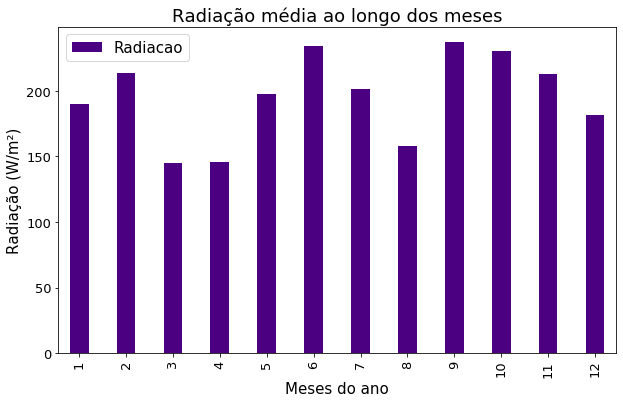

In [29]:
#Radiação média ao longo dos meses (1-Janeiro até 12-Dezembro)

plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 15})
lista_rad.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13, width=0.4);
plt.title("Radiação média ao longo dos meses")
plt.xlabel("Meses do ano")
plt.ylabel("Radiação (W/m²)")
plt.legend()
plt.show()


In [30]:
#Radiação em um dia 
filtro_dia = dataframe.loc[:,'Dia'] == 12
filtro_mes = dataframe.loc[:,'Mes'] == 3

dia = dataframe.loc[filtro_dia & filtro_mes, ['Radiacao','Hora']]
dia.head(5)

,Radiacao,Hora
31822,1.23,23:55:34
31823,1.19,23:50:35
31824,1.24,23:45:37
31825,1.22,23:40:33
31826,1.20,23:35:34


In [39]:
dia["Hora"] = pd.to_datetime(dia['Hora']).dt.time
dia.head(5)

,Radiacao,Hora
31822,1.23,23:55:34
31823,1.19,23:50:35
31824,1.24,23:45:37
31825,1.22,23:40:33
31826,1.20,23:35:34


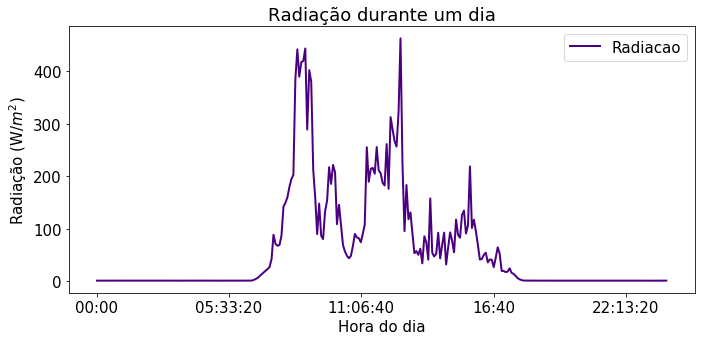

In [47]:
#Plotando o gráfico:

plt.figure(figsize=(10,5))
plt.plot(dia.Hora,dia.Radiacao, label='Radiacao', color='indigo', linewidth=2) 
plt.title("Radiação durante um dia")
plt.xlabel("Hora do dia")
plt.ylabel("Radiação (W/$m^2$)")
plt.legend()
plt.tight_layout()
plt.show()

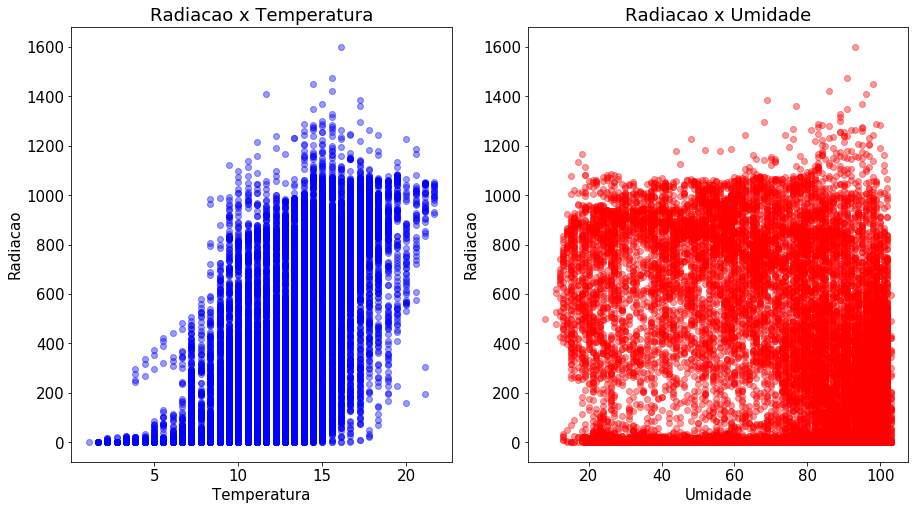

In [42]:
#Scatter plots (sugiro temp x radiacao e umidade x radiacao - Sugiro alteração aqui, dá para ver nada =P)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(dataframe.Temperatura_Graus, dados_novo.Radiacao, c='blue', alpha=0.4)
plt.title('Radiacao x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Radiacao')

plt.subplot(1,2,2)
plt.scatter(dataframe.Umidade, dataframe.Radiacao, c='red', alpha=0.4)
plt.title('Radiacao x Umidade')
plt.xlabel('Umidade')
plt.ylabel('Radiacao')


plt.show()

### ❑ Storytelling geral dos dados:

(5.0, 0.0)

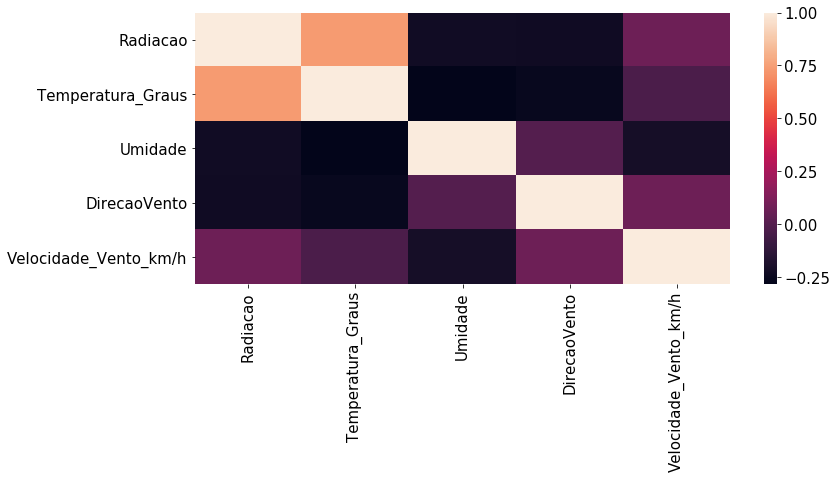

In [43]:
#Fazendo um "pequeno" filtro para uma análise melhor dos dados, ou seja, pegando só variáveis quantitativas importantes:
heat = dataframe.loc[:,['Radiacao','Temperatura_Graus',
                        'Pressao_atm','Umidade','DirecaoVento','Velocidade_Vento_km/h']]

#Calcula coeficientes de correlação (matriz):
corr = heat.corr()

#Plotando mapa de calor e fazendo alguns ajustes 
plt.figure(figsize = (12,5))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
baixo, topo = ax.get_ylim()
ax.set_ylim(baixo + 0.5, topo - 0.5)

▶ O heatmap analisa os coeficientes de correlação, ou seja, o quão uma variável se relaciona/depende da outra. Nesse sentido, cores mais claras indicam relação entre as colunas. Por sua vez, cores mais escuras indicam que as colunas não tem muita relação! 

▶ No caso , como nosso projeto visa **prever a radiação**, ela é a **variável que importa** relacionada a **outras features**. Isso é uma informação que será útil para os futuros modelos. Veja que, por exemplo, Radiação e Temperatura são as duas colunas que mais estão relacionadas. 

## > Modelos de Predição 

### ❑ Descrição e aplicação do Modelo 1 (Treinamento) - Regressão simples?:

### ❑ Descrição e aplicação do Modelo 2 (Treinamento):

## > Processo e Estatísticas de Validação dos modelos (Teste)

### ❑ Validação do Modelo 1:

### ❑ Validação do Modelo 2:

## > Conclusão 

## > Referências Bibliográficas 